In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

## Provide detailed information about a DataFrame, including its structure and the data types of each column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

# Data Cleaning

## Count the number of null values in each column.

In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
296    False
297    False
298    False
299    False
300    False
Length: 301, dtype: bool

In [12]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [13]:
cat=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)

In [14]:
num = []
for i in df.columns:
    if df[i].dtype!='object':
        num.append(i)

In [15]:
print('Categorical columns',cat)
print("="*100)
print('Numerical columns',num)


Categorical columns ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']
Numerical columns ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']


In [16]:
print(f"{i} has {np.round((df[i].isnull().sum()/len(df[i])*100),4)}% null values")

Owner has 0.0% null values


## Data Preprocessing

In [18]:
# Create Age feature
current_year = 2025
df['Age'] = current_year - df['Year']
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)


## Encode categorical variables

In [20]:
le = LabelEncoder()
categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [21]:
df.head()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,3.35,5.59,27000,2,0,1,0,11
1,4.75,9.54,43000,1,0,1,0,12
2,7.25,9.85,6900,2,0,1,0,8
3,2.85,4.15,5200,2,0,1,0,14
4,4.60,6.87,42450,1,0,1,0,11


## 4. Feature-Target Split

In [23]:

X = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Model Training

In [25]:
models={
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting' : GradientBoostingRegressor(random_state=42)
}

## Train and evaluate models

In [27]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    }

## 6. Model Evaluation

In [29]:
# Display results
for model_name, metrics in results.items():
    print(f"\n{model_name} Performance:")
    print(f"MSE: {metrics['MSE']:.2f}")
    print(f"MAE: {metrics['MAE']:.2f}")
    print(f"R²: {metrics['R2']:.2f}")


Linear Regression Performance:
MSE: 3.53
MAE: 1.22
R²: 0.85

Random Forest Performance:
MSE: 0.94
MAE: 0.64
R²: 0.96

Gradient Boosting Performance:
MSE: 0.79
MAE: 0.56
R²: 0.97


## Visualize predictions vs actual

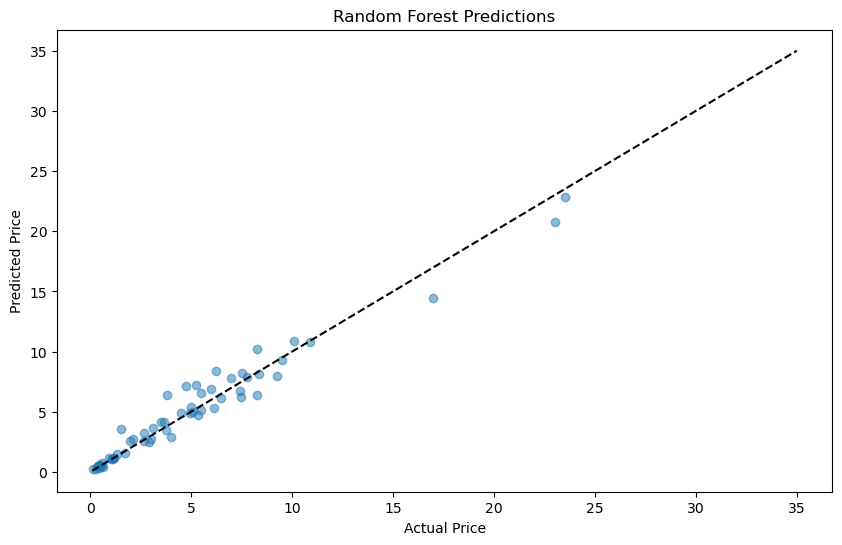

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, models['Random Forest'].predict(X_test), alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest Predictions')
plt.show()


## Title: "Random Forest Predictions" 

**Axes:**

**Y-axis:** Represents the "Predicted Price" of cars, ranging from 0 to 35.

**X-axis:** Represents the "Actual Price" of cars, likely ranging similarly from 0 to 35.

**Reference Line:** A dashed diagonal line is present, showing where predicted prices would perfectly match actual prices (ideal scenario).

**Data Points:** The scatter plot shows data points clustered closely around the diagonal line, indicating that the model's predictions are generally accurate and aligned with actual prices.

**Performance Insight:** The tight clustering of points around the diagonal line suggests the Random Forest model performs well, with high accuracy in predicting car prices, especially in the lower to mid-price ranges. Some dispersion at higher prices may indicate slightly less accuracy for more expensive cars.


## Feature Importance

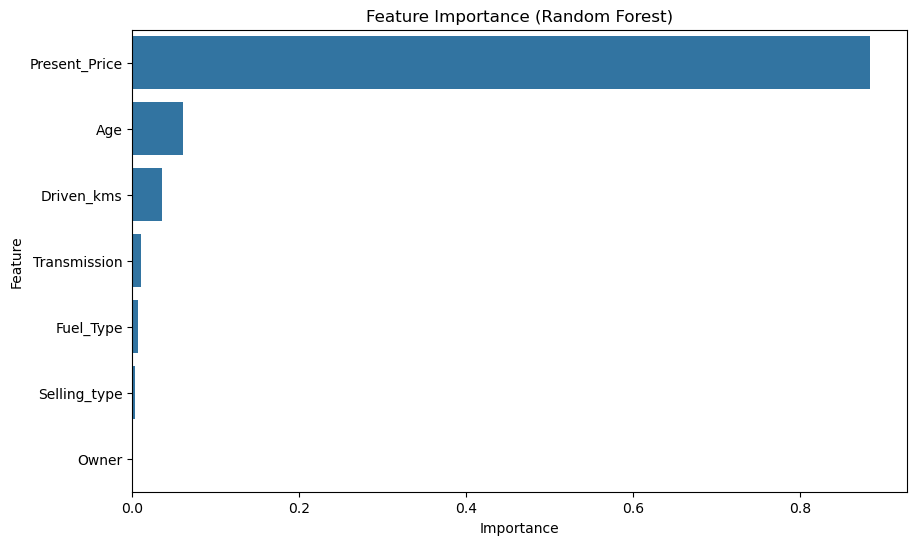

In [34]:
rf = models['Random Forest']
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.show()

1. **Title**: "Feature Importance (Random Forest)" - Highlights the significance of features in predicting car prices.

2. **Axes**:  
   - **Y-axis**: Lists features like Present_Price, Age, Driven_kms, etc.  
   - **X-axis**: Represents "Importance" scores (0.0 to 0.8).

3. **Key Feature**: "Present_Price" has the highest importance (closest to 0.8), indicating it is the most influential factor in predicting car prices.

4. **Other Features**: "Age" and "Driven_kms" follow in importance, while "Transmission," "Fuel_Type," "Selling_type," and "Owner" have relatively lower impact.

5. **Insight:** The graph shows that current price, age, and mileage are the primary drivers of car price predictions, with other features contributing less significantly.